In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import csv

Customer = pd.read_csv('C:/Users/SHRUTI/Desktop/Business Analytics material/Case Studies/Python Case Studies/3. Pandas Case Study 1 - Retail Case Study/Customer.csv')
prod_cat_info = pd.read_csv('C:/Users/SHRUTI/Desktop/Business Analytics material/Case Studies/Python Case Studies/3. Pandas Case Study 1 - Retail Case Study/prod_cat_info.csv')
Transactions = pd.read_csv('C:/Users/SHRUTI/Desktop/Business Analytics material/Case Studies/Python Case Studies/3. Pandas Case Study 1 - Retail Case Study/Transactions.csv')

### Q1 Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [103]:
prod_cat_info.rename(columns={'prod_sub_cat_code':'prod_subcat_code'},inplace=True)
prod_concat = pd.merge(left=Transactions, right=prod_cat_info,on=['prod_cat_code','prod_subcat_code'],how='left')
Customer_Final = pd.merge(left=prod_concat, right=Customer,right_on='customer_Id', left_on='cust_id', how='left')

#converting dates to correct format
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'])
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])

Customer_Final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-11-05,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-08-06,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0


### Q2.a Get the column names and their corresponding data types

In [87]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23053 non-null  int64         
 1   cust_id           23053 non-null  int64         
 2   tran_date         23053 non-null  object        
 3   prod_subcat_code  23053 non-null  int64         
 4   prod_cat_code     23053 non-null  int64         
 5   Qty               23053 non-null  int64         
 6   Rate              23053 non-null  int64         
 7   Tax               23053 non-null  float64       
 8   total_amt         23053 non-null  float64       
 9   Store_type        23053 non-null  object        
 10  prod_cat          23053 non-null  object        
 11  prod_subcat       23053 non-null  object        
 12  customer_Id       23053 non-null  int64         
 13  DOB               23053 non-null  datetime64[ns]
 14  Gender            2304

### Q2.b Top/Bottom 10 observations

In [358]:
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,age
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,38.0,14198 days 02:59:38.374423
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-11-05,F,8.0,46.0,17080 days 02:59:38.374423
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,28.0,10241 days 02:59:38.374423
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-08-06,M,3.0,39.0,14249 days 02:59:38.374423
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,28.0,10241 days 02:59:38.374423
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,1982-09-10,F,6.0,37.0,13849 days 02:59:38.374423
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,1981-05-29,M,9.0,39.0,14318 days 02:59:38.374423
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,1971-04-21,M,9.0,49.0,18009 days 02:59:38.374423
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,1971-04-11,F,8.0,49.0,18019 days 02:59:38.374423
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,1979-11-27,F,3.0,40.0,14867 days 02:59:38.374423


In [89]:
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,1976-08-10,M,8.0
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,1991-10-12,M,4.0
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,1980-01-17,F,8.0
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,1975-06-28,F,6.0
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,1974-04-18,M,4.0
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,1982-01-15,M,1.0


### Q2.c -“Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [90]:
Five_number_summary['min'] = Customer_Final[['Qty', 'Rate', 'Tax', 'total_amt']].min()
Five_number_summary['Q1'] = Customer_Final[['Qty', 'Rate', 'Tax', 'total_amt']].quantile(.25)
Five_number_summary['median'] = Customer_Final[['Qty', 'Rate', 'Tax', 'total_amt']].median()
Five_number_summary['Q3'] = Customer_Final[['Qty', 'Rate', 'Tax', 'total_amt']].quantile(.75)
Five_number_summary['max'] = Customer_Final[['Qty', 'Rate', 'Tax', 'total_amt']].max()
Five_number_summary.T

,Qty,Rate,Tax,total_amt
median,3.0,710.0,199.080,1754.740
min,-5.0,-1499.0,7.350,-8270.925
Q1,1.0,312.0,98.280,762.450
Q3,4.0,1109.0,365.715,3569.150
max,5.0,1500.0,787.500,8287.500


### Q2d. Frequency tables for all the categorical variables

In [91]:
Customer_Final.loc[:,Customer_Final.dtypes=="object"].describe()

,tran_date,Store_type,prod_cat,prod_subcat,Gender
count,23053,23053,23053,23053,23044
unique,1129,4,6,18,2
top,13-07-2011,e-Shop,Books,Women,M
freq,35,9311,6069,3048,11811


### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

### Histograms for countinous variables

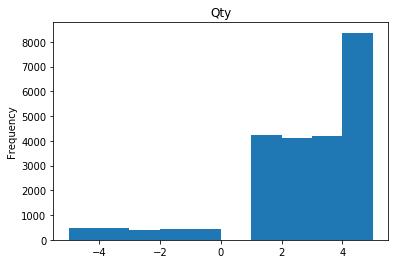

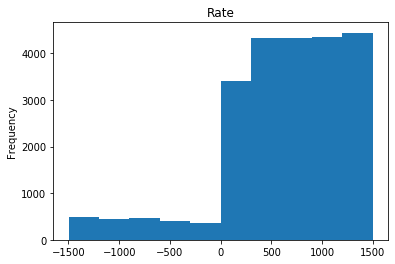

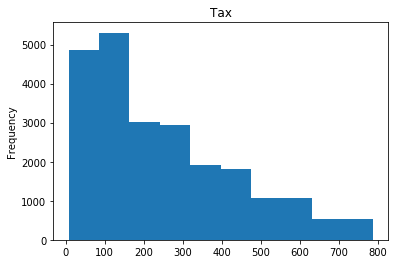

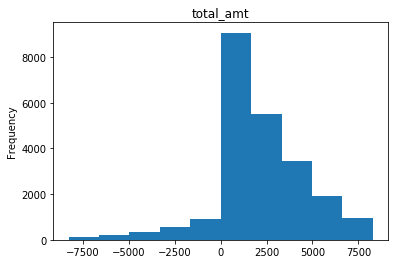

In [92]:
conti_customer = Customer_Final[['Qty', 'Rate', 'Tax', 'total_amt']]

for var in conti_customer.columns:
    conti_customer[var].plot(kind='hist')
    plt.title(var)
    plt.show()

### Frequency  bars for categorical variables

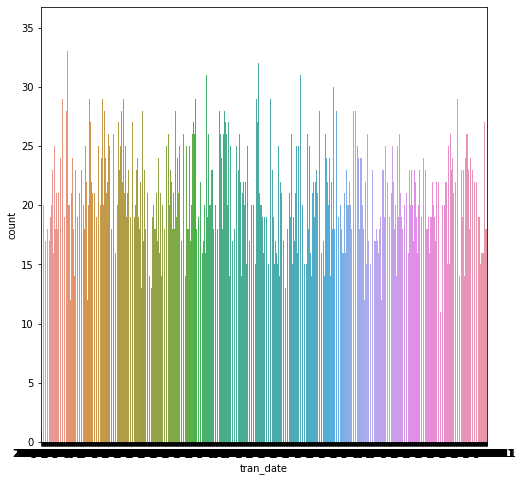

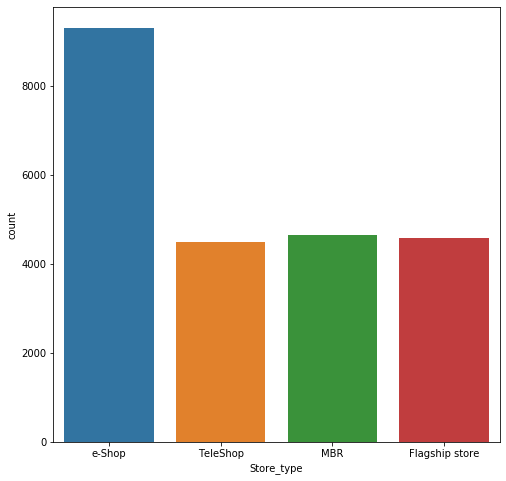

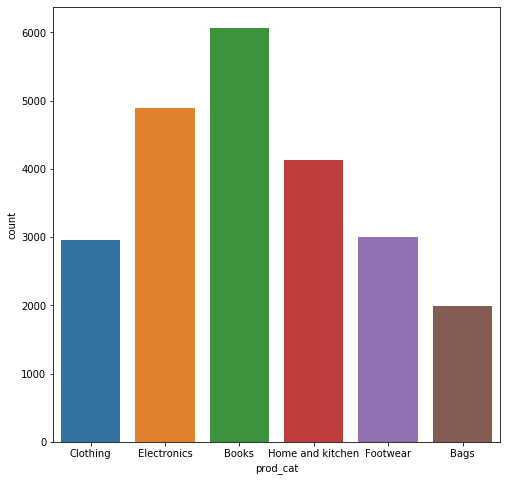

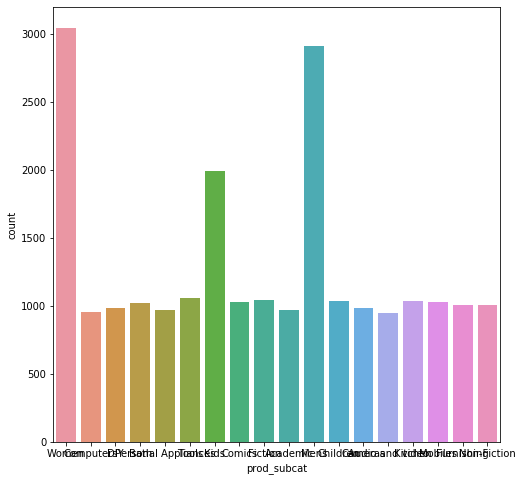

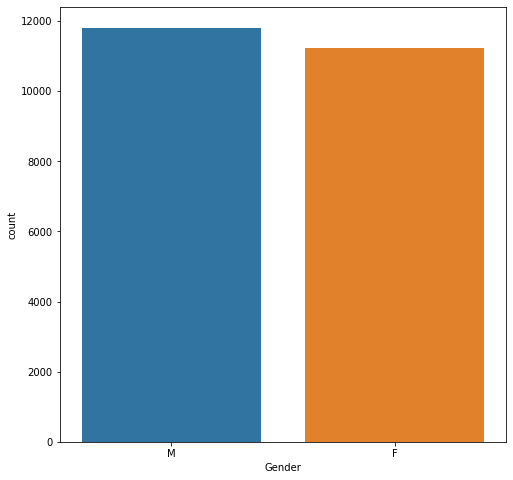

In [93]:
categ_customer = Customer_Final.loc[:, Customer_Final.dtypes=='object']

for var in categ_customer.columns:

    plt.figure(figsize=(8,8))
    sns.countplot(categ_customer[var])
    plt.xlabel(var)
    plt.show()

### 4. Calculate the following information using the merged dataset :
### a. Time period of the available transaction data

In [114]:

max_date = Customer_Final['tran_date'].max()
min_date = Customer_Final['tran_date'].min()

print('Time period: ' + pd.Timestamp.strftime(min_date,format = '%d-%m-%Y') + ' to ' + pd.Timestamp.strftime(max_date,format = '%d-%m-%Y'))

Time period: 02-01-2011 to 02-12-2014


### b. Count of transactions where the total amount of transaction was negative

In [119]:
len(Customer_Final[Customer_Final['total_amt'] < 0])

2177

### 5. Analyze which product categories are more popular among females vs male customers.

In [149]:
gender_cat = Customer_Final[['Gender', 'Qty', 'prod_cat']].sort_values(by='Qty', ascending = False)
gender_cat = gender_cat.groupby(['Gender', 'prod_cat'])

gender_cat.sum()      

Qty
Gender prod_cat              
F      Bags              2362
       Books             7070
       Clothing          3425
       Electronics       5832
       Footwear          3716
       Home and kitchen  4895
M      Bags              2346
       Books             7587
       Clothing          3748
       Electronics       6476
       Footwear          3555
       Home and kitchen  5041

### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [225]:
customer_group = Customer_city['city_code'].count().sort_values(ascending =False)
print(customer_group.head(3))

percentage = round((customer_group[4.0] / customer_group.sum()) * 100,2)
print('City code with maximum customers is : 4.0, with percentage' , percentage)

city_code
4.0    2422
3.0    2411
5.0    2360
Name: city_code, dtype: int64
City code with maximum customers is : 4.0, with percentage 10.51


### 7. Which store type sells the maximum products by value and by quantity?

In [249]:
customer_prod = Customer_Final[['Store_type', 'Qty', 'Rate']]
customer_prod = customer_prod.groupby('Store_type').sum().sort_values(by = ['Qty', 'Rate'], ascending = False)


print(customer_prod)
print('e-Shop store sell the maximum products by value and by quantity')

                  Qty     Rate
Store_type                    
e-Shop          22763  5941001
MBR             11194  2953253
Flagship store  11133  2941557
TeleShop        10984  2834420
e-Shop store sell the maximum products by value and by quantity


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [294]:
customer_prod = Customer_Final[['Store_type', 'prod_cat', 'total_amt']]
customer_prod = customer_prod[customer_prod['Store_type'] == 'Flagship store']
customer_prod = customer_prod[customer_prod.prod_cat.isin(['Electronics','Clothing']) & (customer_prod.Store_type == 'Flagship store')]

total = customer_prod.total_amt.sum()

print('Total amount earned: ', total)

Total amount earned:  3409559.27


### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [300]:
customer_prod = Customer_Final[['Gender', 'prod_cat', 'total_amt']]
customer_prod = customer_prod[(customer_prod.Gender == 'M') & (customer_prod.prod_cat == 'Electronics')]

total = customer_prod.total_amt.sum()

print('Total amount earned: ', total)

Total amount earned:  5703109.424999999


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [345]:
cust_pos = Customer_Final[Customer_Final['total_amt'] > 0].groupby(['cust_id', 'transaction_id']).count().reset_index()
cust_pos = cust_pos[['cust_id', 'transaction_id']]
cust_pivot = cust_pos.pivot_table(index='cust_id', values='transaction_id', aggfunc=len)
cust_pivot[cust_pivot.transaction_id > 10]

print(cust_pivot[cust_pivot.transaction_id > 10])
print('No. of customers with more than 10 transactions is 6')

         transaction_id
cust_id                
266794               11
270535               11
270803               11
272741               11
273014               11
274227               11
No. of customers with more than 10 transactions is 6


### 11. For all customers aged between 25 - 35, find out:
### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [360]:
now = pd.Timestamp('now')   
Customer_Final['DOB'] = Customer_Final['DOB'].where(Customer_Final['DOB'] < now, Customer_Final['DOB'] -  np.timedelta64(100, 'Y'))   
Customer_Final['AGE'] = (now - Customer_Final['DOB']).astype('<m8[Y]')


Customer_Final['Age_cat'] = pd.cut(Customer_Final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)
customer_25_35 = Customer_Final.groupby(['Age_cat','prod_cat'])['total_amt'].sum()
customer_25_35.loc['25-35',['Books','Electronics']]
print("Total amount spent on 'Electronics' and 'Books' product categories is", 
      customer_25_35.loc['25-35',['Books','Electronics']].sum().round(2))

Total amount spent on 'Electronics' and 'Books' product categories is 8529394.45


### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [361]:
customer_total_amount_25_35 = Customer_Final[Customer_Final['Age_cat']=='25-35']

total_amount = customer_total_amount_25_35[(customer_total_amount_25_35['tran_date'] >='2014-01-01') & (customer_total_amount_25_35['tran_date'] <='2014-03-01')]

print('The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is',
      total_amount['total_amt'].sum())

The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is 573796.665
